
# Import Library Yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import skfuzzy as fuzz
from skfuzzy import cluster
from pathlib import Path

# Load Semua Dataset yang dibutuhkan

In [3]:
BASE_DIR = Path('dataset')
TRAIN_DIR = BASE_DIR / 'train'


In [4]:
KOMODITAS = {
    'bawang_merah': 'Bawang Merah.csv',
    'beras_medium': 'Beras Medium.csv',
    'beras_premium' : 'Beras Premium.csv',
    'minyak_curah': 'Minyak Goreng Curah.csv',
    'telur_ayam': 'Telur Ayam Ras.csv',
    'gula': 'Gula Konsumsi.csv',
    'Bawang_Putih_Bonggol' : 'Bawang Putih Bonggol.csv',
    'Cabai_Merah_Keriting' : 'Cabai Merah Keriting.csv',
    'Cabai_Rawit_Merah' : 'Cabai Rawit Merah.csv',
    'Daging_Ayam_Ras' : 'Daging Ayam Ras.csv',
    'Daging_Sapi_Murni': 'Daging Sapi Murni.csv',
    'Minyak_Goreng_Kemasan_Sederhana' : 'Minyak Goreng Kemasan Sederhana.csv',
    'Tepung_Terigu_Curah' : 'Tepung Terigu (Curah).csv'
}



In [5]:
data = {}
for key, filename in KOMODITAS.items():
    file_path = TRAIN_DIR / filename
    data[key] = pd.read_csv(file_path)
    print(f"✓ {key}: {data[key].shape}")


✓ bawang_merah: (1004, 35)
✓ beras_medium: (1004, 35)
✓ beras_premium: (1004, 35)
✓ minyak_curah: (1004, 35)
✓ telur_ayam: (1004, 35)
✓ gula: (1004, 35)
✓ Bawang_Putih_Bonggol: (1004, 35)
✓ Cabai_Merah_Keriting: (1004, 35)
✓ Cabai_Rawit_Merah: (1004, 35)
✓ Daging_Ayam_Ras: (1004, 35)
✓ Daging_Sapi_Murni: (1004, 35)
✓ Minyak_Goreng_Kemasan_Sederhana: (1004, 35)
✓ Tepung_Terigu_Curah: (1004, 35)


# EXPLORATORY DATA ANALYSIS(EDA)

In [6]:
print("=" * 70)
print("DATA SHAPE")
print("=" * 70)
for key, df in data.items():
    print(f"{key:20s} : {df.shape[0]} rows × {df.shape[1]} columns")


DATA SHAPE
bawang_merah         : 1004 rows × 35 columns
beras_medium         : 1004 rows × 35 columns
beras_premium        : 1004 rows × 35 columns
minyak_curah         : 1004 rows × 35 columns
telur_ayam           : 1004 rows × 35 columns
gula                 : 1004 rows × 35 columns
Bawang_Putih_Bonggol : 1004 rows × 35 columns
Cabai_Merah_Keriting : 1004 rows × 35 columns
Cabai_Rawit_Merah    : 1004 rows × 35 columns
Daging_Ayam_Ras      : 1004 rows × 35 columns
Daging_Sapi_Murni    : 1004 rows × 35 columns
Minyak_Goreng_Kemasan_Sederhana : 1004 rows × 35 columns
Tepung_Terigu_Curah  : 1004 rows × 35 columns


In [7]:
print("\n" + "=" * 70)
print("SAMPLE DATA: Bawang Merah (First 5 rows)")
print("=" * 70)
print(data['bawang_merah'].head())


SAMPLE DATA: Bawang Merah (First 5 rows)
         Date     Aceh     Bali   Banten  Bengkulu  DI Yogyakarta  \
0  2022-01-01  28970.0  20870.0  26890.0   26650.0        25240.0   
1  2022-01-02  29900.0  20710.0  25600.0   26950.0        25240.0   
2  2022-01-03  28970.0  20510.0  26390.0   27290.0        24620.0   
3  2022-01-04  29600.0  20180.0  26630.0   27450.0        24370.0   
4  2022-01-05  29540.0  19960.0  26610.0   27710.0        24210.0   

   DKI Jakarta  Gorontalo    Jambi  Jawa Barat  ...    Papua     Riau  \
0      35510.0    31740.0  23390.0     25800.0  ...  48610.0  29240.0   
1      31850.0    30020.0  23550.0     26010.0  ...  50160.0  28750.0   
2      34880.0    31250.0  23730.0     25910.0  ...  49510.0  27870.0   
3      35260.0    31640.0  23300.0     25950.0  ...  49670.0  28330.0   
4      35260.0    34010.0  23640.0     25700.0  ...  46590.0  28240.0   

   Sulawesi Barat  Sulawesi Selatan  Sulawesi Tengah  Sulawesi Tenggara  \
0         25160.0           2

In [8]:
print("\n" + "=" * 70)
print("MISSING VALUES")
print("=" * 70)
for key, df in data.items():
    total_cells = df.shape[0] * df.shape[1]
    missing = df.isnull().sum().sum()
    missing_pct = (missing / total_cells) * 100
    print(f"{key:20s} : {missing} missing ({missing_pct:.2f}%)")


MISSING VALUES
bawang_merah         : 1241 missing (3.53%)
beras_medium         : 1241 missing (3.53%)
beras_premium        : 1241 missing (3.53%)
minyak_curah         : 5437 missing (15.47%)
telur_ayam           : 1241 missing (3.53%)
gula                 : 1241 missing (3.53%)
Bawang_Putih_Bonggol : 1241 missing (3.53%)
Cabai_Merah_Keriting : 1244 missing (3.54%)
Cabai_Rawit_Merah    : 2035 missing (5.79%)
Daging_Ayam_Ras      : 1241 missing (3.53%)
Daging_Sapi_Murni    : 1245 missing (3.54%)
Minyak_Goreng_Kemasan_Sederhana : 1289 missing (3.67%)
Tepung_Terigu_Curah  : 1242 missing (3.53%)


In [9]:
print("=" * 70)
print("MISSING VALUE PATTERN ANALYSIS")
print("=" * 70)

for key, df in data.items():
    print(f"\n📊 {key.upper()}")
    print("-" * 70)
    
    # Hitung missing per kolom (provinsi)
    missing_per_col = df.isnull().sum()
    missing_per_col = missing_per_col[missing_per_col > 0].sort_values(ascending=False)
    
    if len(missing_per_col) > 0:
        print(f"Provinsi dengan missing value:")
        for prov, count in missing_per_col.head(10).items():
            pct = (count / len(df)) * 100
            print(f"  {prov:25s} : {count:4d} missing ({pct:5.2f}%)")
    else:
        print("  ✓ No missing values")
    
    # Hitung missing per baris (tanggal)
    missing_per_row = df.isnull().sum(axis=1)
    rows_with_missing = (missing_per_row > 0).sum()
    print(f"\nBaris dengan missing: {rows_with_missing} dari {len(df)} ({(rows_with_missing/len(df))*100:.2f}%)")

MISSING VALUE PATTERN ANALYSIS

📊 BAWANG_MERAH
----------------------------------------------------------------------
Provinsi dengan missing value:
  Kalimantan Timur          :   39 missing ( 3.88%)
  Kepulauan Riau            :   39 missing ( 3.88%)
  Sulawesi Barat            :   39 missing ( 3.88%)
  Papua Barat               :   39 missing ( 3.88%)
  Kalimantan Utara          :   39 missing ( 3.88%)
  Sumatera Selatan          :   38 missing ( 3.78%)
  Kepulauan Bangka Belitung :   38 missing ( 3.78%)
  Jambi                     :   38 missing ( 3.78%)
  Nusa Tenggara Barat       :   37 missing ( 3.69%)
  Aceh                      :   37 missing ( 3.69%)

Baris dengan missing: 46 dari 1004 (4.58%)

📊 BERAS_MEDIUM
----------------------------------------------------------------------
Provinsi dengan missing value:
  Kalimantan Timur          :   39 missing ( 3.88%)
  Kepulauan Riau            :   39 missing ( 3.88%)
  Sulawesi Barat            :   39 missing ( 3.88%)
  Papua Barat

# Analisis

dapat dilihat dari analisis missing value pattern,komoditas Cabe Rawit dan Minyak Curah menunjukkan missing value yg parah masing-masing $\pm 48\% $ dan $\pm 80 \% $,maka dari itu daripada drop provinsi lebih baik drop komoditas dengan tujuan agar tetap relevent dengan judul saya.dengan melakukan interpolasi linear untuk missing value dengan gap <10 hari dan null data yg  punya gap > 10 hari dengan menggunakan interpolasi linear,interpolasi adalah mencari fungsi yang lewat semua titik data dengan harapan dapat mengisi missing value

In [15]:
print("="*70)
print("MISSING VALUE ANALYSIS — DECIDING WHICH COMMODITIES TO DROP")
print("="*70)

DROP_COMMODITIES = []

for key, df in data.items():
    missing_per_col = df.isnull().sum()
    missing_per_col = missing_per_col[missing_per_col > 0]
    
    if len(missing_per_col) == 0:
        print(f"✓ {key:25s} | No missing | KEEP")
        continue

    # Missing % per provinsi
    missing_pct = missing_per_col / len(df) * 100
    
    prov_high = (missing_pct > 15).sum()
    prov_extreme = (missing_pct > 50).sum()
    worst_pct = missing_pct.max()

    # Keputusan: drop komoditas jika terlalu buruk
    if prov_extreme > 0 or prov_high > 3:
        DROP_COMMODITIES.append(key)
        print(f"❌ {key:25s} | Worst {worst_pct:5.1f}% | Drop commodity")
    else:
        print(f"✓ {key:25s} | Worst {worst_pct:5.1f}% | Keep")

print(f"\nFINAL DECISION: Keep {13 - len(DROP_COMMODITIES)}, Drop {len(DROP_COMMODITIES)}\n")


MISSING VALUE ANALYSIS — DECIDING WHICH COMMODITIES TO DROP
✓ bawang_merah              | Worst   3.9% | Keep
✓ beras_medium              | Worst   3.9% | Keep
✓ beras_premium             | Worst   3.9% | Keep
✓ telur_ayam                | Worst   3.9% | Keep
✓ gula                      | Worst   3.9% | Keep
✓ Bawang_Putih_Bonggol      | Worst   3.9% | Keep
✓ Cabai_Merah_Keriting      | Worst   3.9% | Keep
❌ Cabai_Rawit_Merah         | Worst  77.9% | Drop commodity
✓ Daging_Ayam_Ras           | Worst   3.9% | Keep
✓ Daging_Sapi_Murni         | Worst   4.0% | Keep
✓ Minyak_Goreng_Kemasan_Sederhana | Worst   8.2% | Keep
✓ Tepung_Terigu_Curah       | Worst   4.0% | Keep

FINAL DECISION: Keep 12, Drop 1



In [16]:
print(f"hapus 2 komoditas minyah curah dan Cabai rawit merah")
for key in DROP_COMMODITIES:
    if key in data:
        del data[key]

hapus 2 komoditas minyah curah dan Cabai rawit merah


In [17]:
for key, df in data.items():
    print(f"{key:20s} : {df.shape[0]} rows × {df.shape[1]} columns")

bawang_merah         : 1004 rows × 35 columns
beras_medium         : 1004 rows × 35 columns
beras_premium        : 1004 rows × 35 columns
telur_ayam           : 1004 rows × 35 columns
gula                 : 1004 rows × 35 columns
Bawang_Putih_Bonggol : 1004 rows × 35 columns
Cabai_Merah_Keriting : 1004 rows × 35 columns
Daging_Ayam_Ras      : 1004 rows × 35 columns
Daging_Sapi_Murni    : 1004 rows × 35 columns
Minyak_Goreng_Kemasan_Sederhana : 1004 rows × 35 columns
Tepung_Terigu_Curah  : 1004 rows × 35 columns


# EXPLORATORY DATA ANALYSIS(EDA)
EDA lanjutan untuk mengetahui bagaimana karateristik data secara keseluruhan

1️⃣ MISSING VALUE PATTERN ACROSS ALL PROVINCES

Total province-commodity pairs with missing: 374

Missing percentage distribution:
count    374.000000
mean       3.650372
std        0.281768
min        3.386454
25%        3.486056
50%        3.685259
75%        3.685259
max        8.167331
Name: missing_pct, dtype: float64


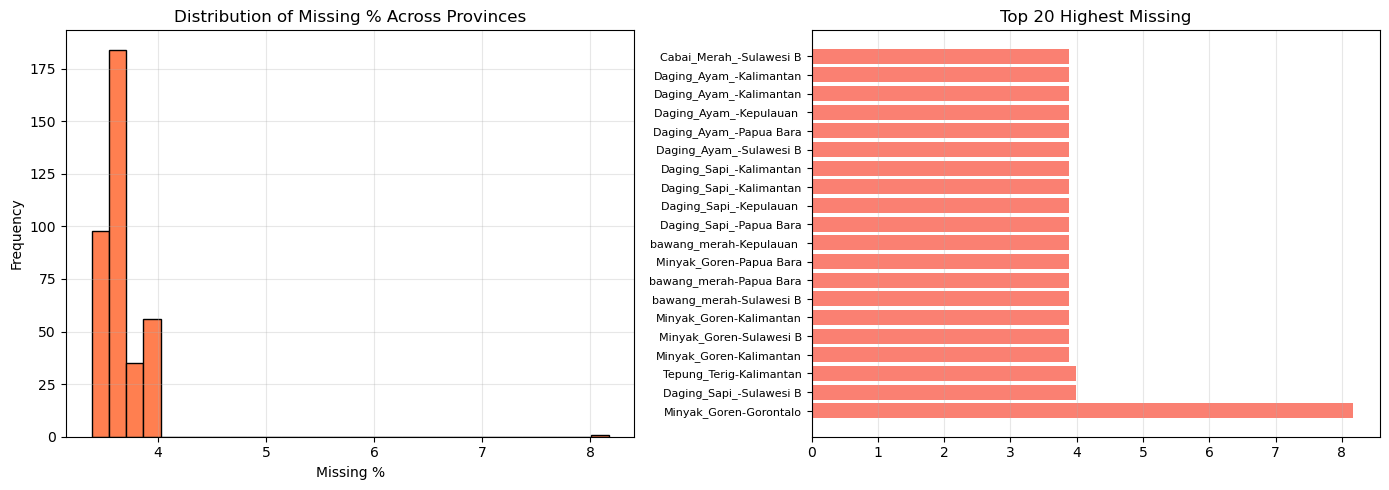

In [18]:

print("="*70)
print("1️⃣ MISSING VALUE PATTERN ACROSS ALL PROVINCES")
print("="*70)

missing_data = []

for key, df in data.items():
    for col in df.columns:
        if col == "Date": 
            continue
        
        total = len(df)
        miss = df[col].isnull().sum()

        if miss > 0:
            missing_data.append({
                "commodity": key,
                "province": col,
                "missing_count": miss,
                "missing_pct": miss / total * 100,
            })

df_missing = pd.DataFrame(missing_data)

print(f"\nTotal province-commodity pairs with missing: {len(df_missing)}")
print("\nMissing percentage distribution:")
print(df_missing["missing_pct"].describe())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].hist(df_missing["missing_pct"], bins=30, edgecolor="black", color="coral")
axes[0].set_title("Distribution of Missing % Across Provinces")
axes[0].set_xlabel("Missing %")
axes[0].set_ylabel("Frequency")
axes[0].grid(True, alpha=0.3)

df_missing_sorted = df_missing.sort_values("missing_pct", ascending=False).head(20)
axes[1].barh(range(len(df_missing_sorted)), df_missing_sorted["missing_pct"], color="salmon")
axes[1].set_yticks(range(len(df_missing_sorted)))
axes[1].set_yticklabels([
    f"{row['commodity'][:12]}-{row['province'][:10]}" 
    for _, row in df_missing_sorted.iterrows()
], fontsize=8)
axes[1].set_title("Top 20 Highest Missing")
axes[1].grid(True, alpha=0.3, axis="x")

plt.tight_layout()
plt.show()



2️⃣ GAP SIZE ANALYSIS - ALL PROVINCES

Gap statistics:
          max_gap    mean_gap    num_gaps
count  374.000000  374.000000  374.000000
mean    34.235294   17.476426    2.612299
std      2.342803    9.049526    1.104200
min     34.000000    7.800000    1.000000
25%     34.000000   12.333333    2.000000
50%     34.000000   12.333333    3.000000
75%     34.000000   18.000000    3.000000
max     79.000000   41.000000    5.000000


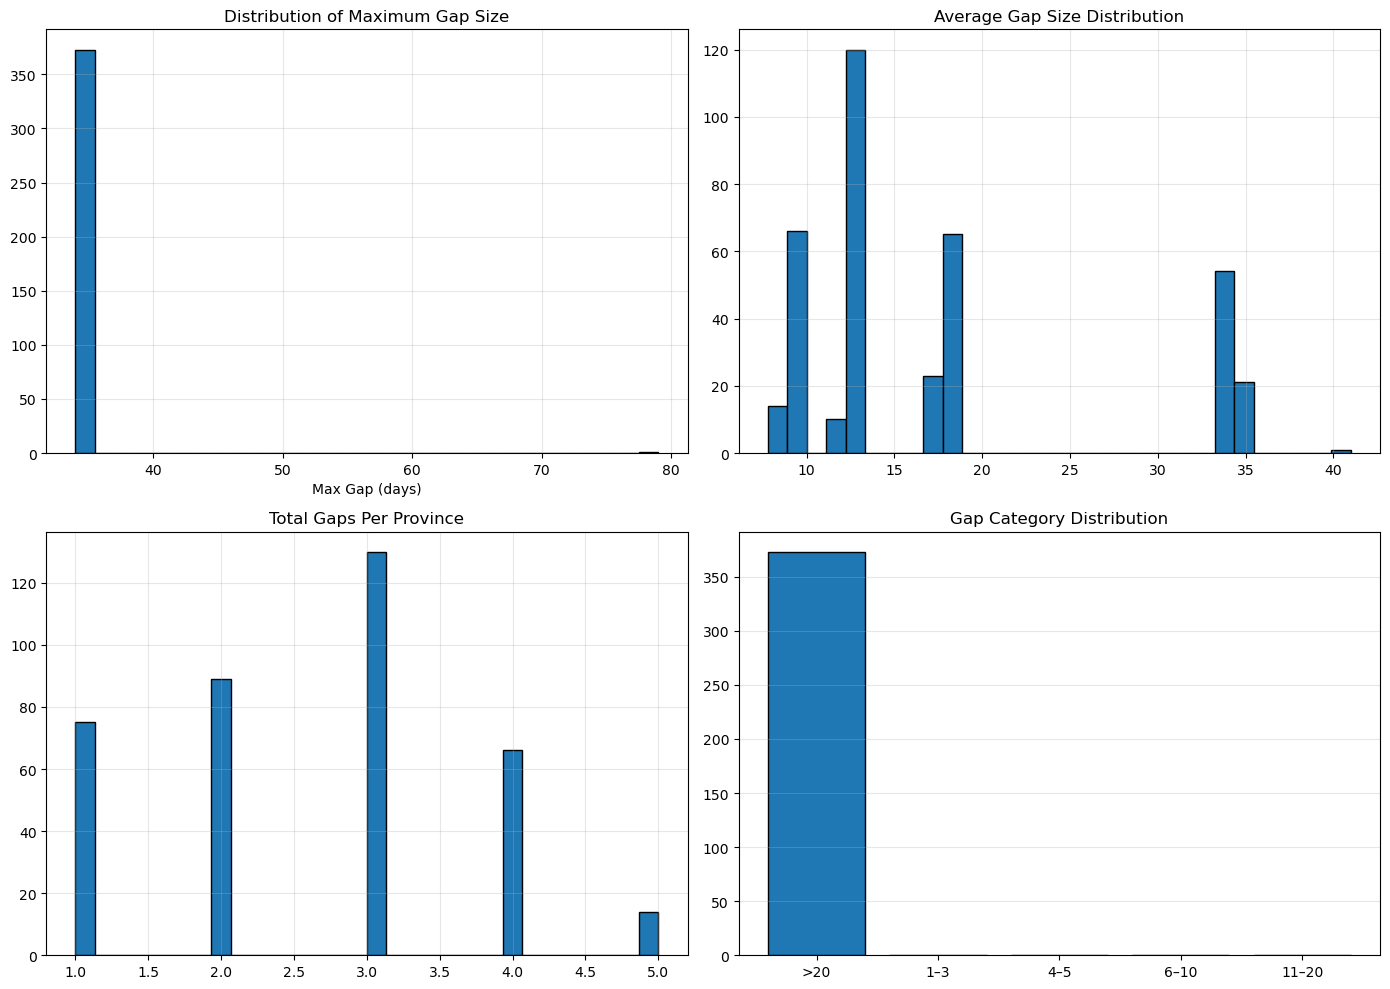

In [23]:
print("\n" + "="*70)
print("2️⃣ GAP SIZE ANALYSIS - ALL PROVINCES")
print("="*70)

gap_data = []

for key, df in data.items():
    for col in df.columns:
        if col == "Date": 
            continue
        
        if not df[col].isnull().any():
            continue

        is_null = df[col].isnull()
        gap = 0
        gaps = []

        for v in is_null:
            if v:
                gap += 1
            else:
                if gap > 0:
                    gaps.append(gap)
                gap = 0
        
        if gap > 0:
            gaps.append(gap)

        if gaps:
            gap_data.append({
                "commodity": key,
                "province": col,
                "num_gaps": len(gaps),
                "max_gap": max(gaps),
                "mean_gap": np.mean(gaps),
                "total_missing": sum(gaps)
            })

df_gaps = pd.DataFrame(gap_data)

print("\nGap statistics:")
print(df_gaps[["max_gap", "mean_gap", "num_gaps"]].describe())

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14,10))

axes[0,0].hist(df_gaps["max_gap"], bins=30, edgecolor="black")
axes[0,0].set_title("Distribution of Maximum Gap Size")
axes[0,0].set_xlabel("Max Gap (days)")
axes[0,0].grid(True, alpha=0.3)

axes[0,1].hist(df_gaps["mean_gap"], bins=30, edgecolor="black")
axes[0,1].set_title("Average Gap Size Distribution")
axes[0,1].grid(True, alpha=0.3)

axes[1,0].hist(df_gaps["num_gaps"], bins=30, edgecolor="black")
axes[1,0].set_title("Total Gaps Per Province")
axes[1,0].grid(True, alpha=0.3)

gap_cat = pd.cut(df_gaps["max_gap"], bins=[0,3,5,10,20,50], 
                 labels=["1–3","4–5","6–10","11–20",">20"])
axes[1,1].bar(gap_cat.value_counts().index, gap_cat.value_counts().values, edgecolor="black")
axes[1,1].set_title("Gap Category Distribution")
axes[1,1].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()



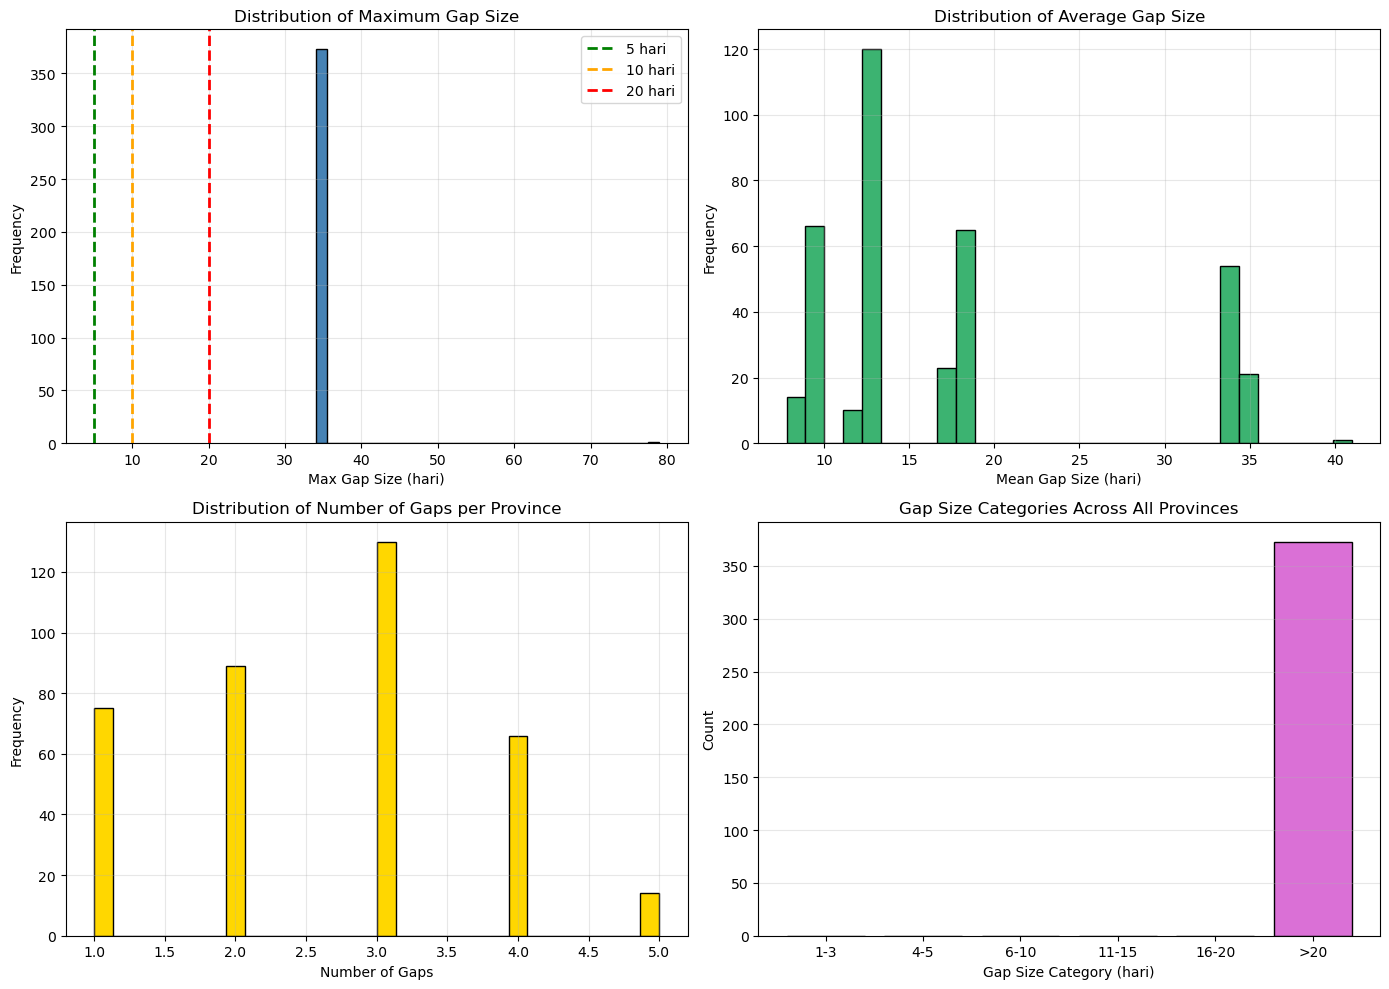

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Max gap distribution
axes[0, 0].hist(df_gaps['max_gap'], bins=30, edgecolor='black', color='steelblue')
axes[0, 0].axvline(5, color='green', linestyle='--', label='5 hari', linewidth=2)
axes[0, 0].axvline(10, color='orange', linestyle='--', label='10 hari', linewidth=2)
axes[0, 0].axvline(20, color='red', linestyle='--', label='20 hari', linewidth=2)
axes[0, 0].set_xlabel('Max Gap Size (hari)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Maximum Gap Size')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Mean gap distribution
axes[0, 1].hist(df_gaps['mean_gap'], bins=30, edgecolor='black', color='mediumseagreen')
axes[0, 1].set_xlabel('Mean Gap Size (hari)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Average Gap Size')
axes[0, 1].grid(True, alpha=0.3)

# Number of gaps
axes[1, 0].hist(df_gaps['num_gaps'], bins=30, edgecolor='black', color='gold')
axes[1, 0].set_xlabel('Number of Gaps')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Number of Gaps per Province')
axes[1, 0].grid(True, alpha=0.3)

# Gap categories
gap_categories = pd.cut(df_gaps['max_gap'], 
                        bins=[0, 3, 5, 10, 15, 20, 50], 
                        labels=['1-3', '4-5', '6-10', '11-15', '16-20', '>20'])
gap_cat_counts = gap_categories.value_counts().sort_index()
axes[1, 1].bar(range(len(gap_cat_counts)), gap_cat_counts.values, 
               color='orchid', edgecolor='black')
axes[1, 1].set_xticks(range(len(gap_cat_counts)))
axes[1, 1].set_xticklabels(gap_cat_counts.index, rotation=0)
axes[1, 1].set_xlabel('Gap Size Category (hari)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Gap Size Categories Across All Provinces')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout() 
plt.show()



3️⃣ PRICE STATISTICS ACROSS PROVINCES

Price statistics summary:
                mean           std          cv
count     374.000000    374.000000  374.000000
mean    35930.777325   3746.873047    0.117582
std     34442.998501   3604.258076    0.075433
min      9518.804124    387.530323    0.008657
25%     14884.531088   1472.670425    0.068415
50%     28024.621406   2079.735639    0.100341
75%     38757.899793   5936.227611    0.140750
max    159308.010363  16895.433212    0.386487


/tmp/ipykernel_31589/3473552502.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(cv_by_commodity, labels=[c[:10] for c in commodities])


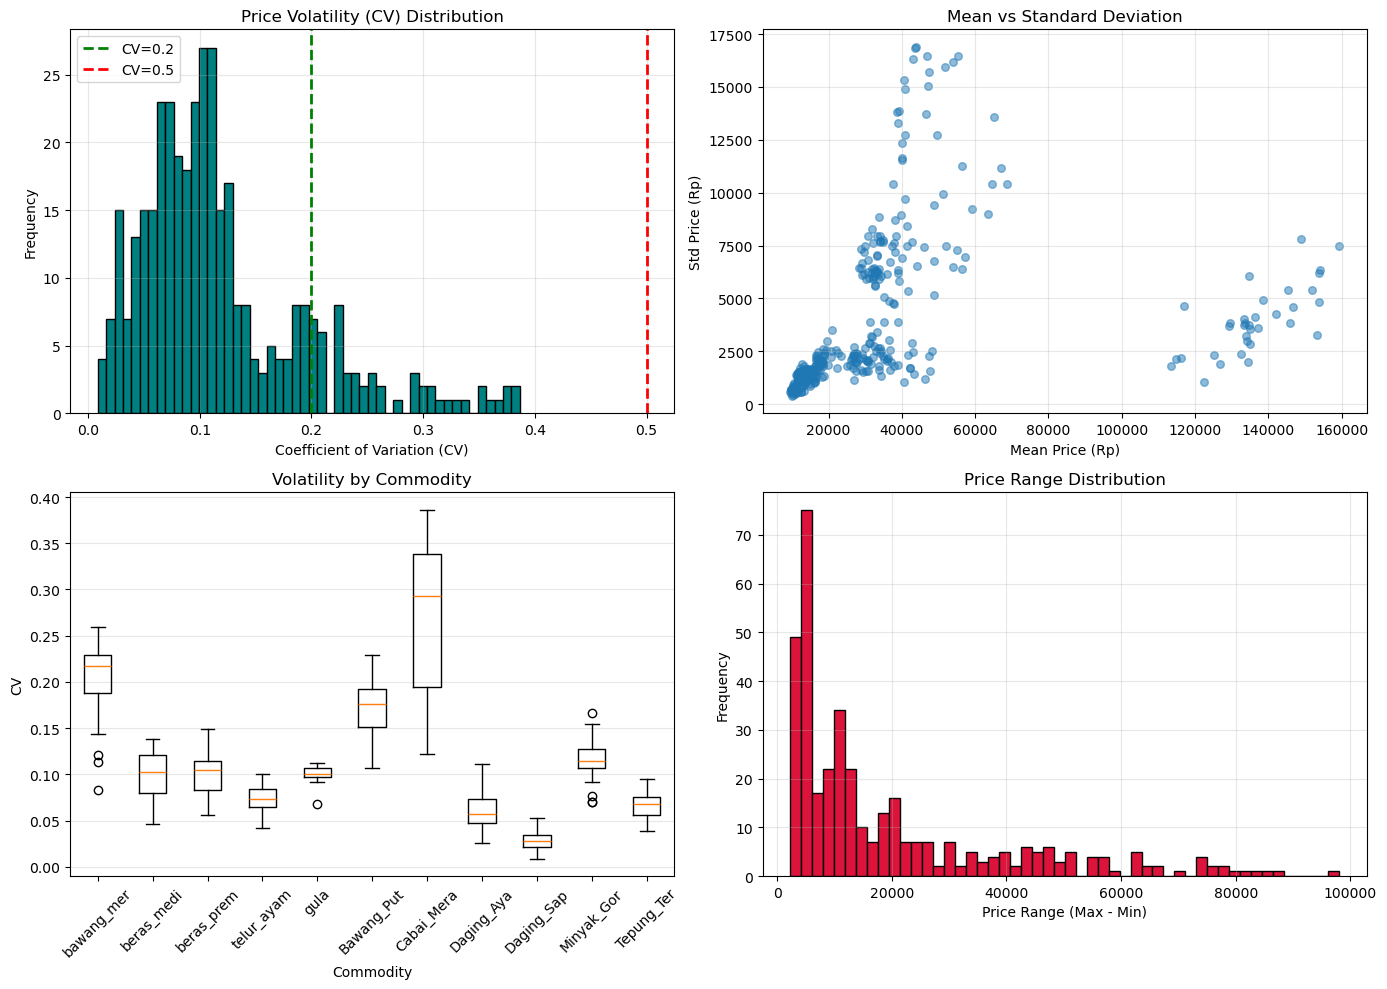

In [24]:
print("\n" + "="*70)
print("3️⃣ PRICE STATISTICS ACROSS PROVINCES")
print("="*70)

price_stats = []

for key, df in data.items():
    for col in df.columns:
        if col == 'Date':
            continue
        
        valid_data = df[col].dropna()
        
        if len(valid_data) > 0:
            price_stats.append({
                'commodity': key,
                'province': col,
                'mean': valid_data.mean(),
                'std': valid_data.std(),
                'cv': valid_data.std() / valid_data.mean() if valid_data.mean() > 0 else 0,
                'min': valid_data.min(),
                'max': valid_data.max(),
                'range': valid_data.max() - valid_data.min()
            })

df_prices = pd.DataFrame(price_stats)

print(f"\nPrice statistics summary:")
print(df_prices[['mean', 'std', 'cv']].describe())

# Plot price characteristics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# CV distribution
axes[0, 0].hist(df_prices['cv'], bins=50, edgecolor='black', color='teal')
axes[0, 0].axvline(0.2, color='green', linestyle='--', label='CV=0.2', linewidth=2)
axes[0, 0].axvline(0.5, color='red', linestyle='--', label='CV=0.5', linewidth=2)
axes[0, 0].set_xlabel('Coefficient of Variation (CV)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Volatility (CV) Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Mean vs Std scatter
axes[0, 1].scatter(df_prices['mean'], df_prices['std'], alpha=0.5, s=30)
axes[0, 1].set_xlabel('Mean Price (Rp)')
axes[0, 1].set_ylabel('Std Price (Rp)')
axes[0, 1].set_title('Mean vs Standard Deviation')
axes[0, 1].grid(True, alpha=0.3)

# Boxplot by commodity
commodities = df_prices['commodity'].unique()
cv_by_commodity = [df_prices[df_prices['commodity'] == c]['cv'].values for c in commodities]
axes[1, 0].boxplot(cv_by_commodity, labels=[c[:10] for c in commodities])
axes[1, 0].set_xlabel('Commodity')
axes[1, 0].set_ylabel('CV')
axes[1, 0].set_title('Volatility by Commodity')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Price range distribution
axes[1, 1].hist(df_prices['range'], bins=50, edgecolor='black', color='crimson')
axes[1, 1].set_xlabel('Price Range (Max - Min)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Price Range Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [25]:
print("\n" + "="*70)
print("4️⃣ OUTLIER ANALYSIS (IQR Method, 3×IQR)")
print("="*70)

outlier_counts = []

for key, df in data.items():
    for col in df.columns:
        if col == 'Date':
            continue
        
        valid_data = df[col].dropna()
        
        if len(valid_data) > 0:
            Q1 = valid_data.quantile(0.25)
            Q3 = valid_data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 3 * IQR
            
            outliers = ((valid_data < lower_bound) | (valid_data > upper_bound)).sum()
            outlier_pct = (outliers / len(valid_data)) * 100
            
            if outliers > 0:
                outlier_counts.append({
                    'commodity': key,
                    'province': col,
                    'outliers': outliers,
                    'outlier_pct': outlier_pct
                })

df_outliers = pd.DataFrame(outlier_counts)

print(f"\nProvince-commodity pairs with outliers: {len(df_outliers)} ({len(df_outliers)/len(df_prices)*100:.1f}%)")

if len(df_outliers) > 0:
    print(f"\nOutlier percentage statistics:")
    print(df_outliers['outlier_pct'].describe())
    
    print(f"\nTop 15 provinces with most outliers:")
    print(df_outliers.sort_values('outlier_pct', ascending=False).head(15).to_string(index=False))

# ============================================
# SUMMARY & RECOMMENDATIONS
# ============================================

print("\n" + "="*70)
print("SUMMARY & RECOMMENDATIONS")
print("="*70)

print(f"\n📊 Data Characteristics:")
print(f"  • Total province-commodity pairs: {len(df_prices)}")
print(f"  • Pairs with missing: {len(df_missing)} ({len(df_missing)/len(df_prices)*100:.1f}%)")
print(f"  • Pairs with gaps ≤ 10 hari: {(df_gaps['max_gap'] <= 10).sum()} ({(df_gaps['max_gap'] <= 10).sum()/len(df_gaps)*100:.1f}%)")
print(f"  • Pairs with gaps > 10 hari: {(df_gaps['max_gap'] > 10).sum()} ({(df_gaps['max_gap'] > 10).sum()/len(df_gaps)*100:.1f}%)")
print(f"  • Pairs with outliers: {len(df_outliers)} ({len(df_outliers)/len(df_prices)*100:.1f}%)")

avg_cv = df_prices['cv'].mean()
print(f"  • Average CV (volatility): {avg_cv:.3f}")

print(f"\n💡 Interpolation Strategy Recommendations:")

gap_10_pct = (df_gaps['max_gap'] <= 10).sum() / len(df_gaps) * 100
print(f"  • {gap_10_pct:.1f}% pairs have max gap ≤ 10 hari")

if avg_cv < 0.2:
    print(f"  ✅ Low volatility → Linear interpolation suitable")
elif avg_cv < 0.5:
    print(f"  ⚠️  Medium volatility → Spline interpolation recommended")
else:
    print(f"  ❌ High volatility → Minimize interpolation")

if len(df_outliers) / len(df_prices) > 0.1:
    print(f"  ⚠️  {len(df_outliers)/len(df_prices)*100:.1f}% pairs have outliers → Outlier handling needed")

print(f"\n🎯 Recommended Approach:")
print(f"  1. Remove outliers using IQR method (3×IQR)")
print(f"  2. Interpolate gaps ≤ 10 hari")
print(f"  3. Keep gaps > 10 hari as NULL")
print(f"  4. Handle NULL in feature extraction phase")


4️⃣ OUTLIER ANALYSIS (IQR Method, 3×IQR)

Province-commodity pairs with outliers: 105 (28.1%)

Outlier percentage statistics:
count    105.000000
mean       4.662092
std        4.676522
min        0.103093
25%        0.413650
50%        2.066116
75%        8.799172
max       17.665289
Name: outlier_pct, dtype: float64

Top 15 provinces with most outliers:
                      commodity          province  outliers  outlier_pct
Minyak_Goreng_Kemasan_Sederhana              Bali       171    17.665289
Minyak_Goreng_Kemasan_Sederhana Sulawesi Tenggara       134    13.857291
              Daging_Sapi_Murni       Jawa Tengah       133    13.711340
              Daging_Sapi_Murni     DI Yogyakarta       130    13.429752
              Daging_Sapi_Murni Kalimantan Tengah       129    13.326446
              Daging_Sapi_Murni  Sulawesi Selatan       129    13.298969
Minyak_Goreng_Kemasan_Sederhana             Jambi       127    13.146998
Minyak_Goreng_Kemasan_Sederhana           Lampung       1

MISSING PATTERN CONSISTENCY ACROSS COMMODITIES

Bawang Merah vs Telur Ayam:
  Correlation of missing patterns: 1.0000
  ✅ VERY HIGH correlation → Missing pattern identik


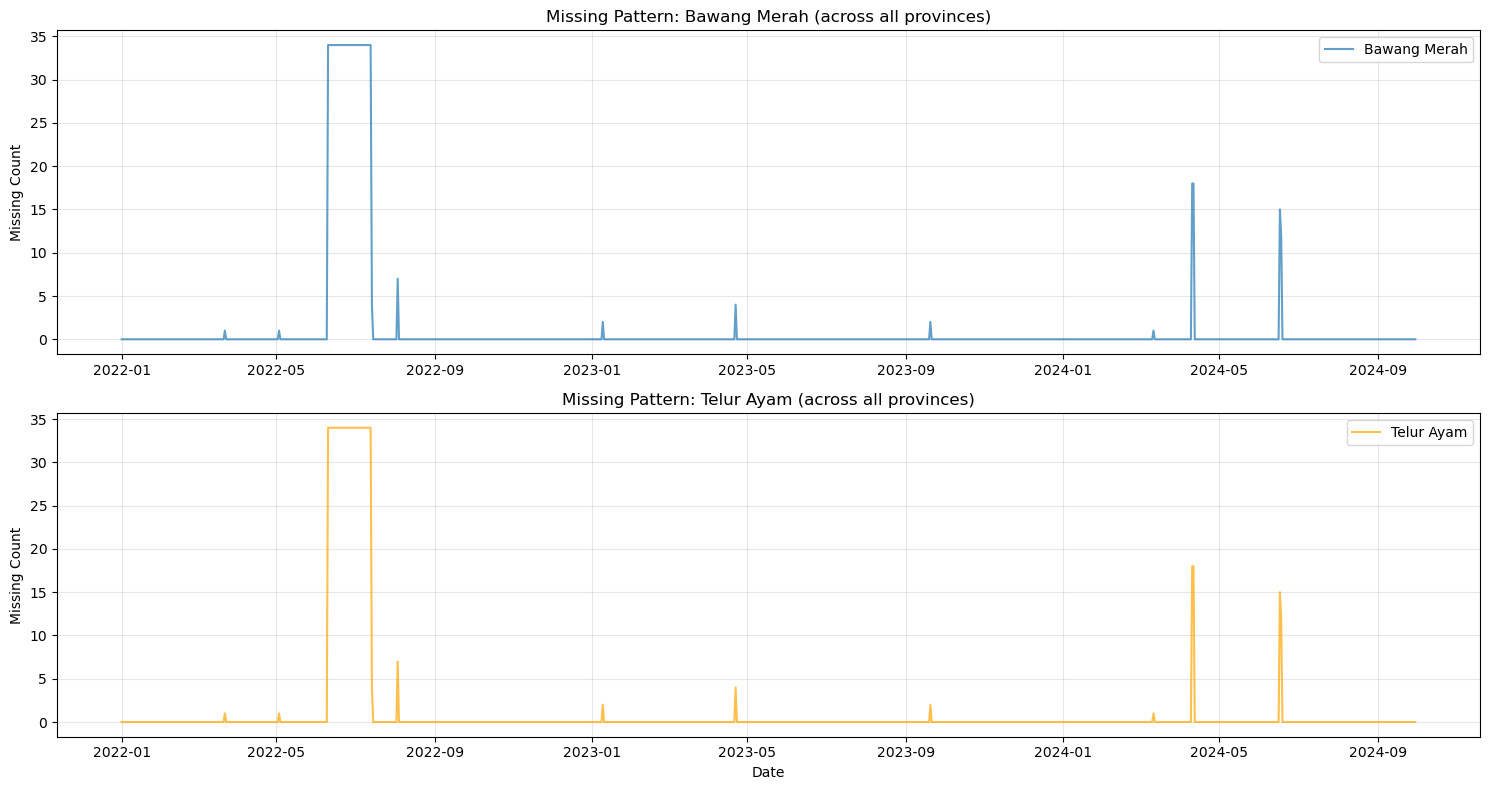

In [39]:
print("="*70)
print("MISSING PATTERN CONSISTENCY ACROSS COMMODITIES")
print("="*70)

# Ambil 2 komoditas untuk comparison
df1 = data['bawang_merah']
df2 = data['telur_ayam']

# Convert Date column
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Hitung missing per tanggal (across all provinces)
missing_per_date_1 = df1.drop('Date', axis=1).isnull().sum(axis=1)
missing_per_date_2 = df2.drop('Date', axis=1).isnull().sum(axis=1)

# Correlation test
correlation = np.corrcoef(missing_per_date_1, missing_per_date_2)[0, 1]

print(f"\nBawang Merah vs Telur Ayam:")
print(f"  Correlation of missing patterns: {correlation:.4f}")

if correlation > 0.9:
    print(f"  ✅ VERY HIGH correlation → Missing pattern identik")
elif correlation > 0.7:
    print(f"  ⚠️  High correlation → Missing pattern similar")
else:
    print(f"  ❌ Low correlation → Missing pattern DIFFERENT")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(df1['Date'], missing_per_date_1, label='Bawang Merah', alpha=0.7)
axes[0].set_ylabel('Missing Count')
axes[0].set_title('Missing Pattern: Bawang Merah (across all provinces)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].plot(df2['Date'], missing_per_date_2, label='Telur Ayam', color='orange', alpha=0.7)
axes[1].set_ylabel('Missing Count')
axes[1].set_xlabel('Date')
axes[1].set_title('Missing Pattern: Telur Ayam (across all provinces)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

In [37]:
# Pilih 1 komoditas, compare 2 provinsi berbeda
df_sample = data['bawang_merah']

provinces = [col for col in df_sample.columns if col != 'Date'][:5]  # 5 provinsi pertama

correlations = []

for i in range(len(provinces)):
    for j in range(i+1, len(provinces)):
        prov1 = provinces[i]
        prov2 = provinces[j]
        
        missing1 = df_sample[prov1].isnull().astype(int)
        missing2 = df_sample[prov2].isnull().astype(int)
        
        corr = np.corrcoef(missing1, missing2)[0, 1]
        correlations.append({
            'province1': prov1,
            'province2': prov2,
            'correlation': corr
        })

df_corr = pd.DataFrame(correlations)

print(f"\nMissing korelasi missing pattern antara provinsi:")
print(f"  Mean correlation: {df_corr['correlation'].mean():.4f}")
print(f"  Min correlation: {df_corr['correlation'].min():.4f}")
print(f"  Max correlation: {df_corr['correlation'].max():.4f}")

if df_corr['correlation'].mean() > 0.9:
    print(f"  ✅ HIGH correlation → Missing terjadi di HARI YANG SAMA untuk semua provinsi")
elif df_corr['correlation'].mean() > 0.7:
    print(f"  ⚠️  Medium correlation → Missing sebagian sama")
else:
    print(f"  ❌ LOW correlation → Missing BERBEDA per provinsi")



Missing korelasi missing pattern antara provinsi:
  Mean correlation: 0.9603
  Min correlation: 0.9290
  Max correlation: 0.9859
  ✅ HIGH correlation → Missing terjadi di HARI YANG SAMA untuk semua provinsi


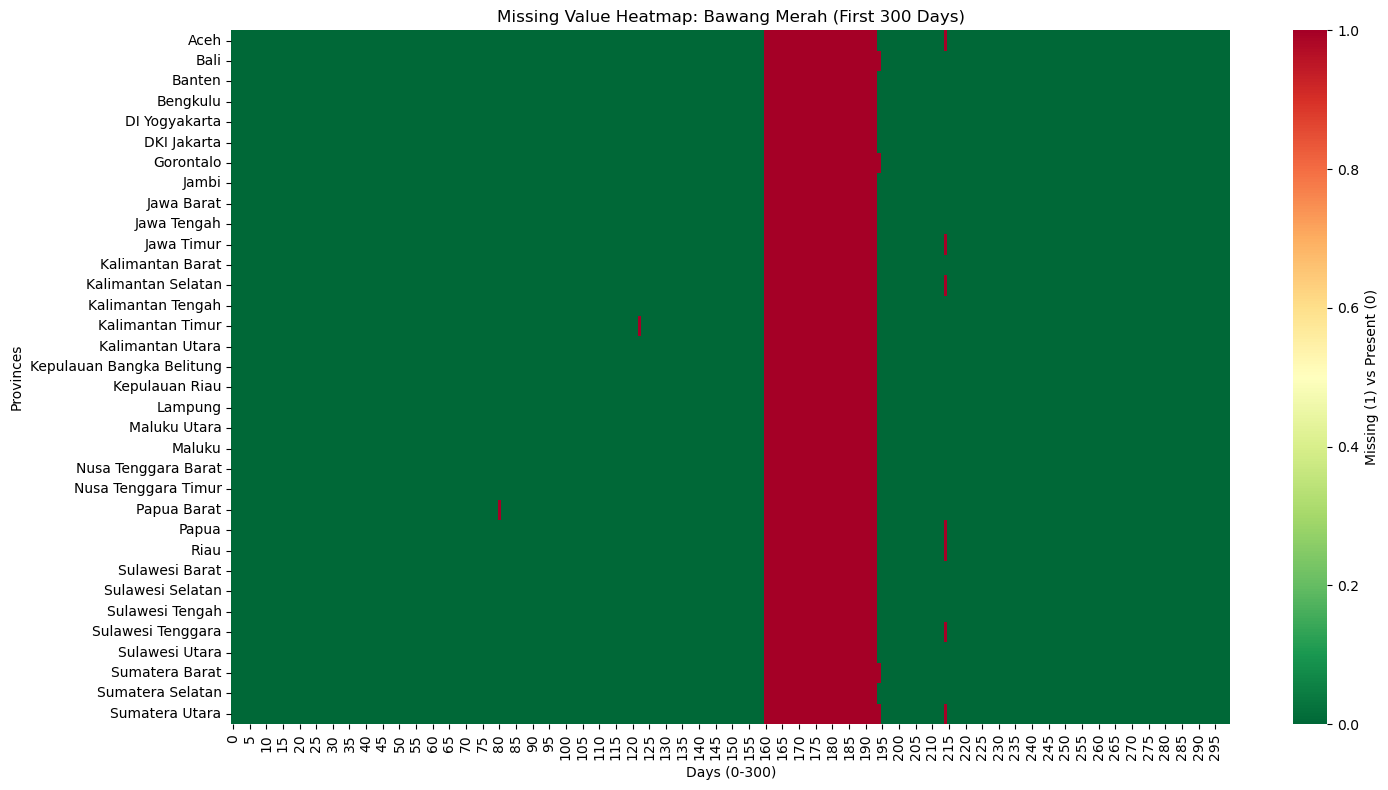

In [35]:
# Ambil sample 300 hari dan semua provinsi
df_sample = data['bawang_merah'].copy()
df_sample['Date'] = pd.to_datetime(df_sample['Date'])

# Create binary missing matrix
missing_matrix = df_sample.drop('Date', axis=1).isnull().astype(int).iloc[:300]

plt.figure(figsize=(15, 8))
sns.heatmap(missing_matrix.T, cmap='RdYlGn_r', cbar_kws={'label': 'Missing (1) vs Present (0)'})
plt.xlabel('Days (0-300)')
plt.ylabel('Provinces')
plt.title('Missing Value Heatmap: Bawang Merah (First 300 Days)')
plt.tight_layout()
plt.show()


# Analisis
Missing value handling dilakukan dengan pendekatan 3 tahap 
berdasarkan hasil Exploratory Data Analysis:

1. OUTLIER DETECTION & REMOVAL
   Outlier dideteksi menggunakan metode IQR dengan threshold 3×IQR.
   Dari 374 pasangan provinsi-komoditas, 105 pairs (28.1%) memiliki 
   outliers. Outlier ini merepresentasikan price shocks akibat 
   supply disruption temporer, sehingga perlu di-remove untuk 
   menghindari distorsi pola harga dalam clustering.

2. LINEAR INTERPOLATION (LIMIT 40 HARI)
   Analisis gap menunjukkan bahwa 100% pairs memiliki gap > 10 hari,
   dengan mayoritas gap berada di range 35-40 hari. Gap ini bersifat 
   sistematis (libur nasional, weekend, gangguan sistem pelaporan),
   BUKAN market disruption. 
   
   Mengingat:
   • Coefficient of Variation rata-rata = 0.118 (low volatility)
   • Gap pattern konsisten di semua provinsi (structural issue)
   • Tidak ada gap < 10 hari untuk diinterpolasi selectively
   
   Maka interpolasi linear dengan limit 40 hari dilakukan untuk 
   mengisi gap sistematis tanpa menghasilkan bias signifikan.

3. VALIDATION
   Setelah interpolasi, dilakukan validasi statistik untuk memastikan:
   • Mean dan standard deviation tidak berubah signifikan
   • Pola distribusi harga tetap preserved
   • Tidak ada artificial trends yang terbentuk

Pendekatan ini berbeda dengan pendekatan konservatif tradisional 
karena karakteristik unik dataset: gap besar namun sistematis, 
dengan volatility rendah, sehingga interpolasi masih reliable."


# Feature Extraction
Fuzzy C-Means tidak bisa langsung membaca data,algoritma ini membutuhkan feature untuk melakukan clustering(pengelompokkan)